# Part 1: Exploratory Data Analysis(EDA) - Laptops Pricing

#### Objectives
   - Visualize individual feature patterns
   - Run descriptive statistical analysis on the dataset
   - Use groups and pivot tables to find the effect of categorical variables on price
   - Use Pearson Correlation to measure the interdependence between variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [6]:
df = pd.read_csv(r"C:\Users\Aayush\Documents\SQL Server Management Studio\31 Day of Data Analytic Project\Day 13 Laptop Pricing Dataset\laptop_pricing_dataset.csv")
df.head(8)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
5,5,5,Dell,3,1,1,5,15.6,0.551724,8,256,4.85100,1016,Low,1,0
6,6,6,HP,3,3,1,5,15.6,0.551724,8,256,4.63050,1117,Low,1,0
7,7,7,Acer,3,2,1,5,15.0,0.551724,4,256,4.85100,866,Low,0,1


In [7]:
# Looks like we have some unnecessary column in the dataset
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.drop('Unnamed: 0.1', inplace = True, axis = 1)
df.head(7)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
5,Dell,3,1,1,5,15.6,0.551724,8,256,4.85100,1016,Low,1,0
6,HP,3,3,1,5,15.6,0.551724,8,256,4.63050,1117,Low,1,0


In [8]:
df.shape

(238, 14)

In [9]:
# Is there any missing value
df.isnull().sum()

Manufacturer        0
Category            0
GPU                 0
OS                  0
CPU_core            0
Screen_Size_inch    0
CPU_frequency       0
RAM_GB              0
Storage_GB_SSD      0
Weight_pounds       0
Price               0
Price-binned        0
Screen-Full_HD      0
Screen-IPS_panel    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      238 non-null    object 
 1   Category          238 non-null    int64  
 2   GPU               238 non-null    int64  
 3   OS                238 non-null    int64  
 4   CPU_core          238 non-null    int64  
 5   Screen_Size_inch  238 non-null    float64
 6   CPU_frequency     238 non-null    float64
 7   RAM_GB            238 non-null    int64  
 8   Storage_GB_SSD    238 non-null    int64  
 9   Weight_pounds     238 non-null    float64
 10  Price             238 non-null    int64  
 11  Price-binned      238 non-null    object 
 12  Screen-Full_HD    238 non-null    int64  
 13  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 26.2+ KB


In [46]:
df.nunique()

Manufacturer         11
Category              5
GPU                   3
OS                    2
CPU_core              3
Screen_Size_inch      9
CPU_frequency        11
RAM_GB                5
Storage_GB_SSD        2
Weight_pounds        78
Price               193
Price-binned          3
Screen-Full_HD        2
Screen-IPS_panel      2
dtype: int64

We have clean dataset with correct data format.

## Visualize individual feature patterns

Generate regression plots for each of the parameters against 'Price'. Aslo print the value of correlation of each feature with 'Price'.

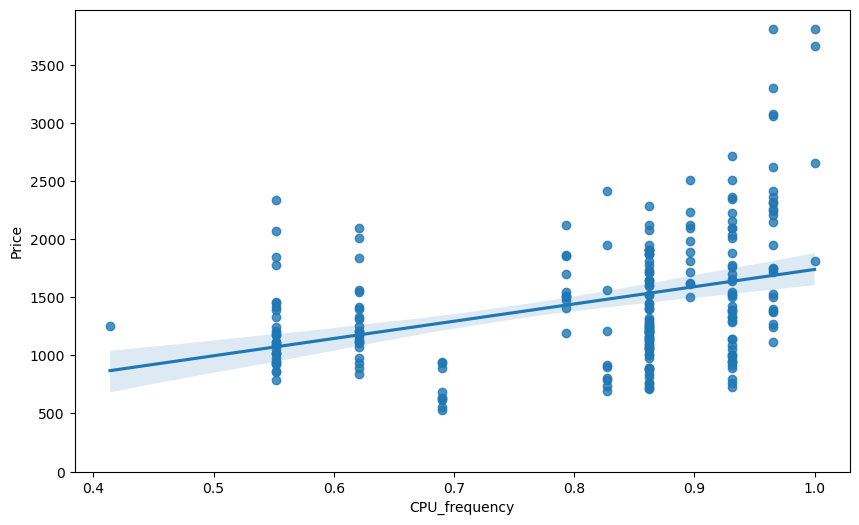

In [12]:
# CPU_frequency plot
plt.figure(figsize = (10,6))
sns.regplot(x= 'CPU_frequency', y = 'Price', data = df)
plt.ylim(0,)
plt.savefig('Images/Regplot-CPU-Price.jpg')

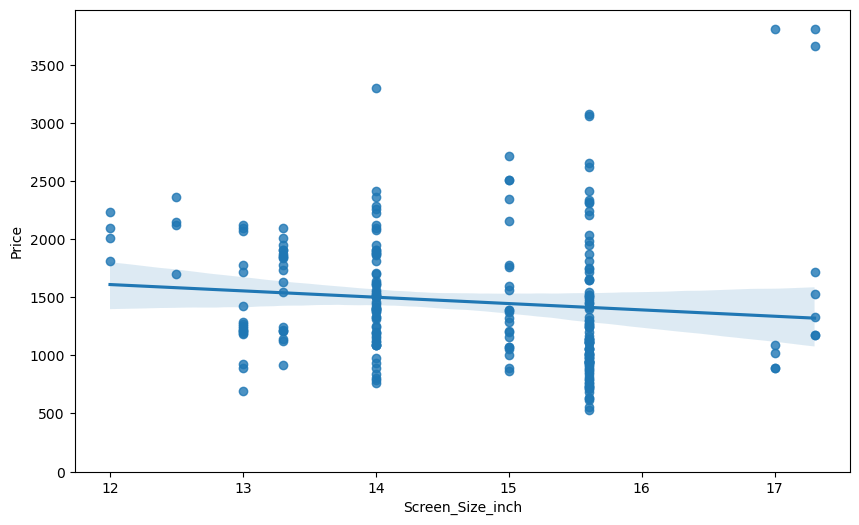

In [14]:
# Screen_size_inch plot

plt.figure(figsize = (10,6))
sns.regplot(x = 'Screen_Size_inch', y = 'Price', data = df)
plt.ylim(0,)
plt.savefig('Images/Regplot-ScreenSize-Price.jpg')

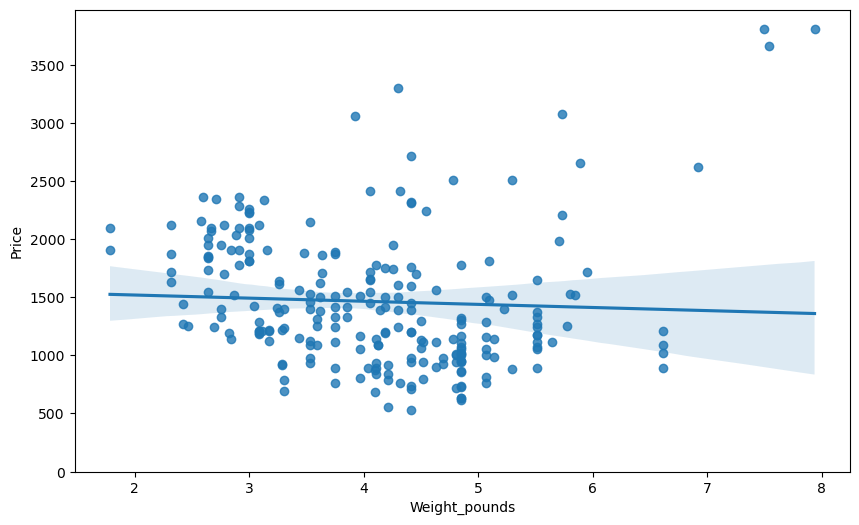

In [16]:
# Weight_pounds plot
plt.figure(figsize = (10,6))
sns.regplot(x= 'Weight_pounds', y = 'Price', data = df)
plt.ylim(0,)
plt.savefig('Images/Regplot-CPU-Price.jpg')

<b> Correlation values of the attributes with Price</b>

In [18]:
for core in ['CPU_frequency','Screen_Size_inch','Weight_pounds']:
    print(f"The correlation of Price and {core} is ",df[[core,'Price']].corr())

The correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
The correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
The correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


"CPU_frequency" has a 36% positive correlation with Price of laptops. The other two parameters have week correlation with Price.

## Categorical Features

General Box plots for the different features that hold categorical values. These features would be 'Category', 'GPU', 'OS', 'CPU_core','RAM_GB','Storage_GB_SSD'

In [19]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


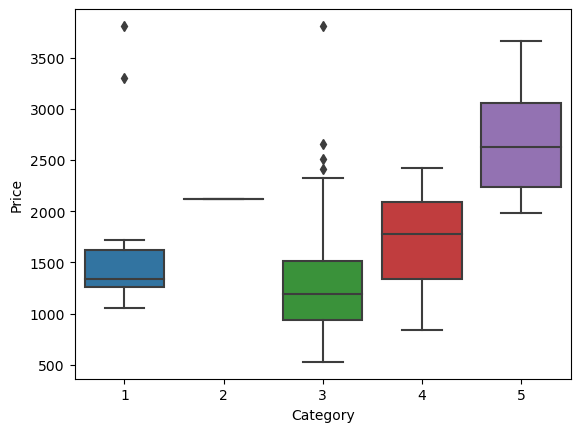

In [22]:
# Category Box plot 

sns.boxplot(x='Category', y = 'Price', data = df)
plt.savefig('Images/BoxPlot-Category-Price.jpg')

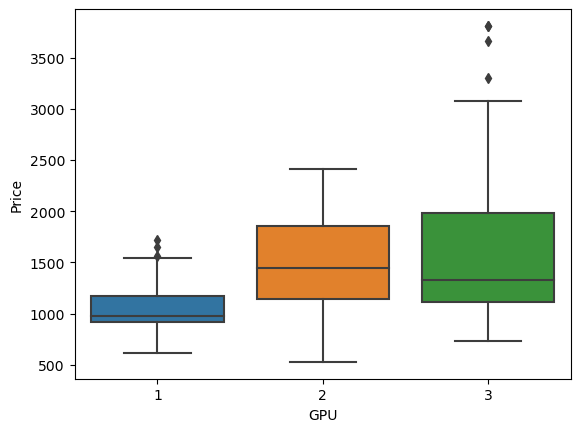

In [24]:
# GPU Box plot
sns.boxplot(x = 'GPU', y = 'Price', data = df)
plt.savefig('Images/BoxPlot-GPU-Price.jpg')

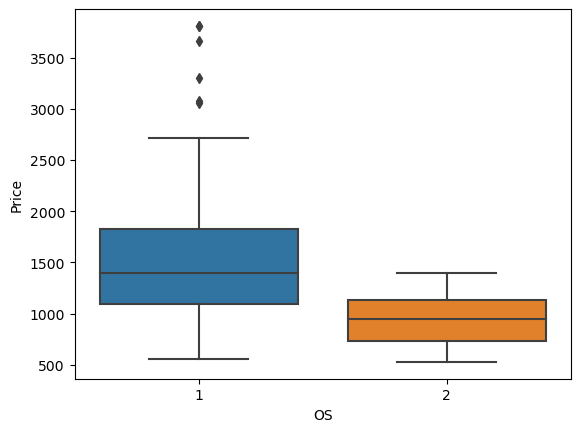

In [27]:
# OS Box plot
sns.boxplot(x = 'OS', y = 'Price', data = df)
plt.savefig('Images/BoxPlot-OS-Price.jpg')

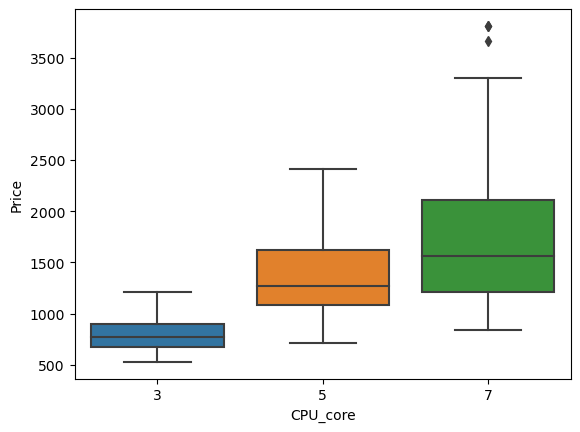

In [28]:
# CPU_core Box plot
sns.boxplot(x = 'CPU_core', y = 'Price', data = df)
plt.savefig('Images/BoxPlot-CPU_core-Price.jpg')

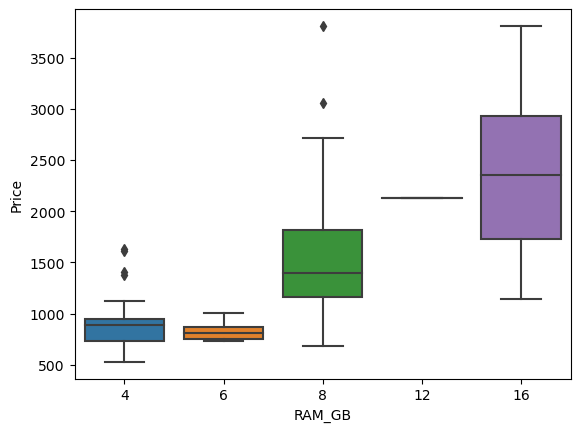

In [29]:
# RAM_GB Box plot
sns.boxplot(x = 'RAM_GB', y = 'Price', data = df)
plt.savefig('Images/BoxPlot-RAM_GB-Price.jpg')

## Descriptive Statistical Analysis

In [30]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [31]:
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


## Group By and Pivot Table

Group the parameters "GPU","CPU_core" and 'Price" to make pivot table and visualize this connection using the pcolor plot

In [53]:
df.groupby('Manufacturer').agg({'Price':['min','max','mean']})

Price                   
               min   max         mean
Manufacturer                         
Acer           727  1650  1067.157895
Asus           527  3810  1327.111111
Dell           616  3665  1495.084507
HP             558  3073  1399.285714
Huawei        1714  1714  1714.000000
Lenovo         634  3810  1493.096154
MSI           1268  1714  1452.750000
Razer         3301  3301  3301.000000
Samsung       1904  2349  2107.400000
Toshiba       1198  2509  1703.882353
Xiaomi        1188  1188  1188.000000

In [34]:
grouping = df[['GPU','CPU_core','Price']]
grouping.head(8)

,GPU,CPU_core,Price
0,2,5,978
1,1,3,634
2,1,7,946
3,2,5,1244
4,2,7,837
5,1,5,1016
6,3,5,1117
7,2,5,866


In [35]:
group_test1 = grouping.groupby(['GPU','CPU_core'], as_index = False).mean()
group_test1

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


<b> Create pivot table </b>


In [36]:
group_ptable = group_test1.pivot(index = 'GPU', columns = 'CPU_core')
group_ptable

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

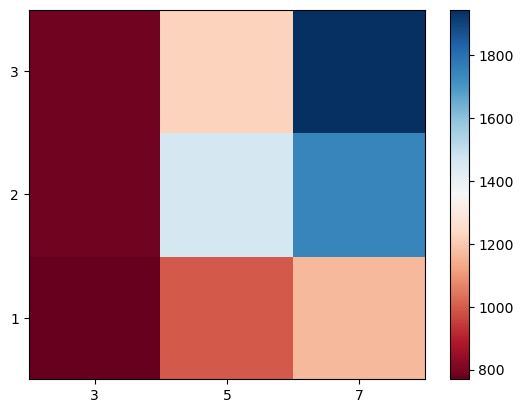

In [41]:
# Create the plot

fig,ax = plt.subplots()
im = ax.pcolor(group_ptable,cmap='RdBu')

# label names
row_labels = group_ptable.columns.levels[1]
col_labels = group_ptable.index

# move ticks and labels to the center
ax.set_xticks(np.arange(group_ptable.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(group_ptable.shape[0]) + 0.5, minor = False)

# insert labels
ax.set_xticklabels(row_labels, minor = False)
ax.set_yticklabels(col_labels, minor = False)

fig.colorbar(im)

## Pearson Correlation and p-values


Using scipy.stats.pearson() function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help to determine the parameters most likely to have strong effect on the price of the laptops.

In [43]:
pearson_coeff, pvalue = stats.pearsonr(df['RAM_GB'], df['Price'])
print('The Pearson Correlation coefficient for RAM_GB is ', pearson_coeff,'with a P-value is ',pvalue)

The Pearson Correlation coefficient for RAM_GB is  0.5492972971857845 with a P-value is  3.681560628842711e-20


In [45]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coeff, pvalue = stats.pearsonr(df[param], df['Price'])
    print(param)
    print('The Pearson Correlation Coefficient for ',param,"is ", pearson_coeff,"with a P-value is ",pvalue)

RAM_GB
The Pearson Correlation Coefficient for  RAM_GB is  0.5492972971857845 with a P-value is  3.681560628842711e-20
CPU_frequency
The Pearson Correlation Coefficient for  CPU_frequency is  0.36666555892588626 with a P-value is  5.502463350713296e-09
Storage_GB_SSD
The Pearson Correlation Coefficient for  Storage_GB_SSD is  0.2434207552181029 with a P-value is  0.00014898923191724174
Screen_Size_inch
The Pearson Correlation Coefficient for  Screen_Size_inch is  -0.11064420817118291 with a P-value is  0.08853397846830666
Weight_pounds
The Pearson Correlation Coefficient for  Weight_pounds is  -0.05031225837751554 with a P-value is  0.43976938534338944
CPU_core
The Pearson Correlation Coefficient for  CPU_core is  0.4593977773355117 with a P-value is  7.912950127009034e-14
OS
The Pearson Correlation Coefficient for  OS is  -0.22172980114827376 with a P-value is  0.0005696642559246749
GPU
The Pearson Correlation Coefficient for  GPU is  0.28829819888814273 with a P-value is  6.166949698

## Part 2: Model Development

I will use linear regression principles to create module that predict the price of laptop, based on one or more attibutes of the dataset.

#### Objective:
   - Use Linear Regression in one variable to fit the parameters to a model
   - Use Linear Regression in multiple variables to fit the parameters to a model.
   - Use Polynomial Regression in single variable to fit the parameters to a model.
   - Create a pipeline for performing linear regression using multiple features in polynomial scaling.
   - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters.

In [56]:
# Importing required libraries

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore', category = UserWarning)


In [57]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


##  Simple Linear Regression

We've learnt that CPU_frequency is the parameter with lowest p-value among different features of the dataset. Creating single feature Linear Regression model that fits the part of 'CPU_frequency' and 'Price' to find the model for prediction.

In [58]:
lm = LinearRegression()
lm

LinearRegression()

In [60]:
X= df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

LinearRegression()

In [61]:
Yhat = lm.predict(X)

Yhat[0:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

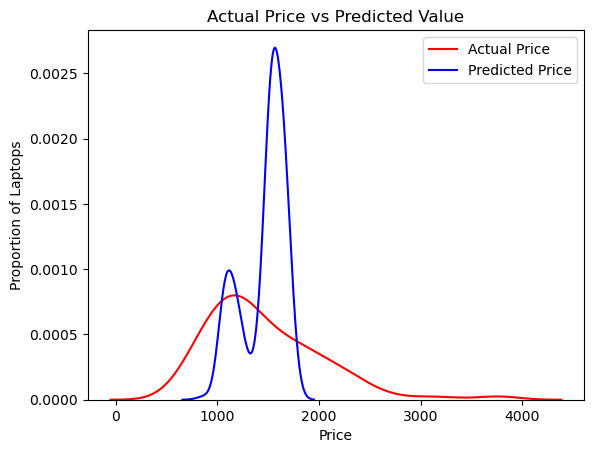

In [62]:
# Distribution plot for the predicted value and actual value

ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Price')

sns.distplot(Yhat, hist = False, color = 'b', label = 'Predicted Value', ax = ax1)

plt.title("Actual Price vs Predicted Value")
plt.xlabel("Price")
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Price','Predicted Price'])
plt.show()


In [63]:
# Evaluate Mean Squared Error and R^2 score values for the model

mse_slm = mean_squared_error(df['Price'],Yhat)
r2_score_slm = lm.score(X,Y)

print('The Mean Squared Error(MSE) for SLR is ', mse_slm)
print('The R-square for Linear Regression is ',r2_score_slm)

The Mean Squared Error(MSE) for SLR is  284583.4405868629
The R-square for Linear Regression is  0.1344436321024326


(0.0, 3974.15)

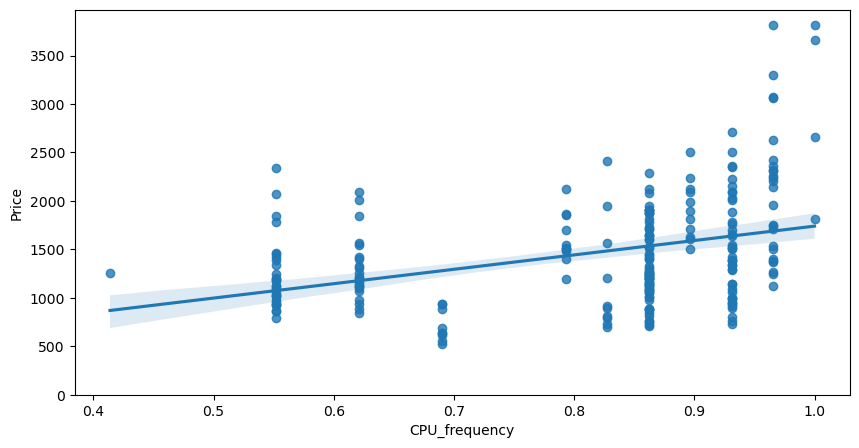

In [69]:
plt.figure(figsize = (10,5))
sns.regplot(x = 'CPU_frequency', y = df['Price'], data = df)
plt.ylim(0,)

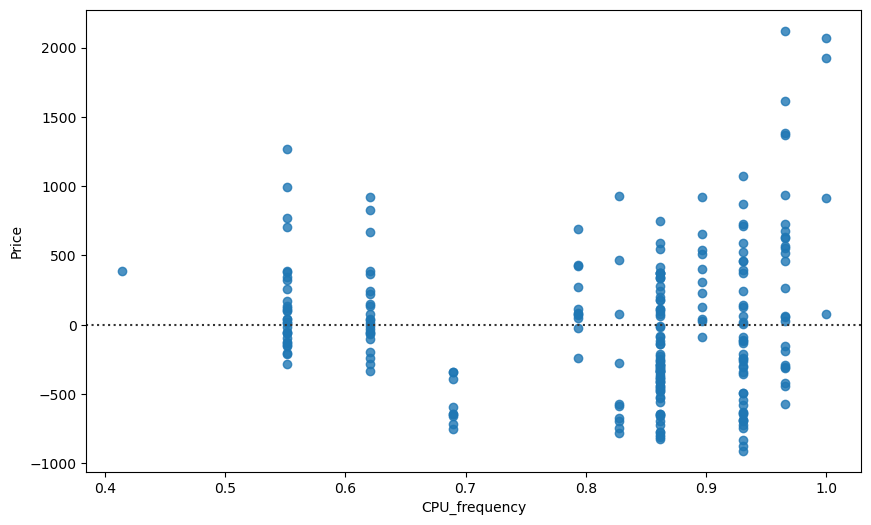

In [70]:
plt.figure(figsize = (10,6))
sns.residplot(x = 'CPU_frequency', y = 'Price',  data = df)
plt.show()

#### For RAM_GB

In [64]:
# for RAM_GB

A = df[['RAM_GB']]
B = df['Price']

lm.fit(A,B)

Ahat = lm.predict(A)
Ahat[0:5]

array([1477.30182253,  968.75414212, 1477.30182253, 1477.30182253,
       1477.30182253])

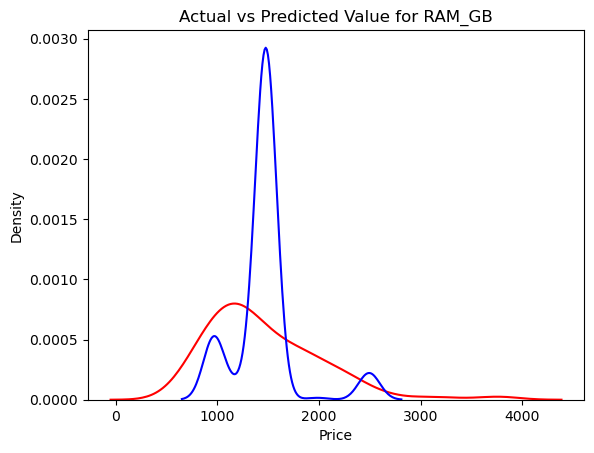

In [67]:
ax1 = sns.distplot(df['Price'], hist = False, label = 'Actual Value', color = 'r')
sns.distplot(Ahat, hist = False, label = 'Predicted Value', color = 'b', ax = ax1)

plt.title('Actual vs Predicted Value for RAM_GB')
plt.show()

In [68]:
# Mean Squared Error and R^2 Score

mse_ram = mean_squared_error(df['Price'], Ahat)
r2_score_ram = lm.score(A,B)

print('The Mean Squared Error(MSE) for SLR is ', mse_ram)
print('The R-square for Linear Regression is ',r2_score_ram)

The Mean Squared Error(MSE) for SLR is  229582.71927482335
The R-square for Linear Regression is  0.3017275206956078


(0.0, 3974.15)

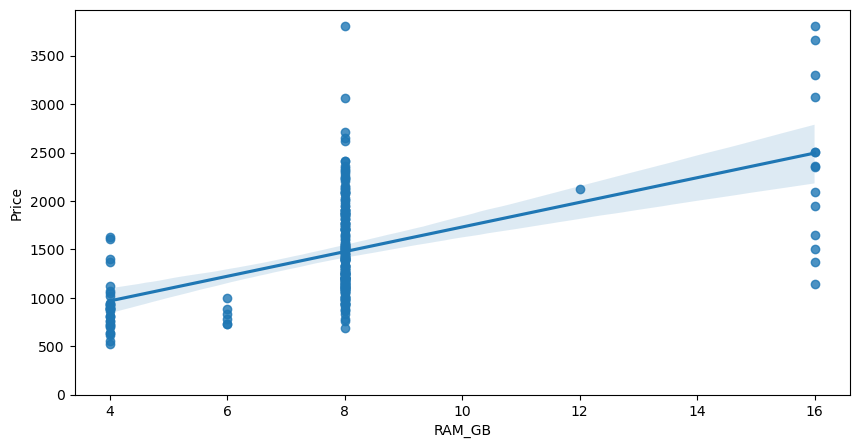

In [71]:
plt.figure(figsize = (10,5))
sns.regplot(x = 'RAM_GB', y = df['Price'], data = df)
plt.ylim(0,)

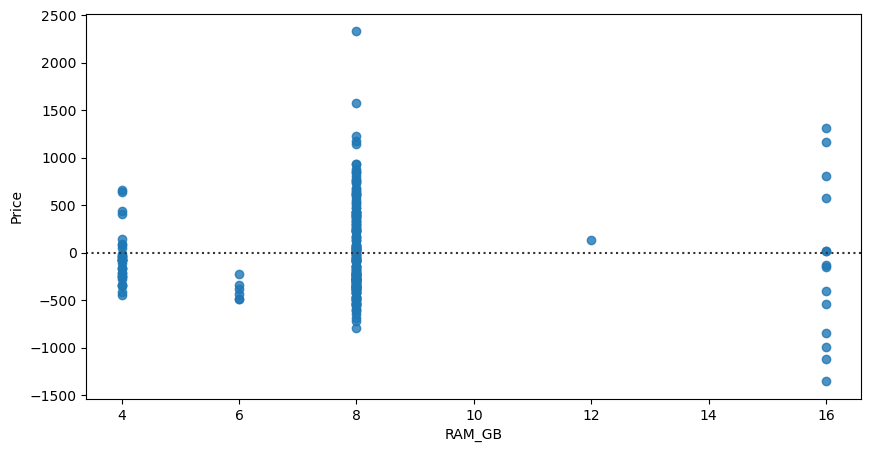

In [72]:
plt.figure(figsize = (10,5))
sns.residplot(x = 'RAM_GB', y = df['Price'], data = df)
plt.show()

## Multiple Linear Regression

The parameters which have low enough p-values so to indicate strong relationship with 'Price' value are 'CPU_frequency','CPU_core','RAM_GB','Storage_GB_SSD','GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression

In [73]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [76]:
Z = df[['CPU_frequency','CPU_core','RAM_GB','Storage_GB_SSD','GPU','Category']]

lm1.fit(Z,Y)

LinearRegression()

In [77]:
Y_hat = lm1.predict(Z)
Y_hat[0:5]

array([1347.895972  ,  650.24589657, 1463.88109036, 1309.96930252,
       1528.1074601 ])

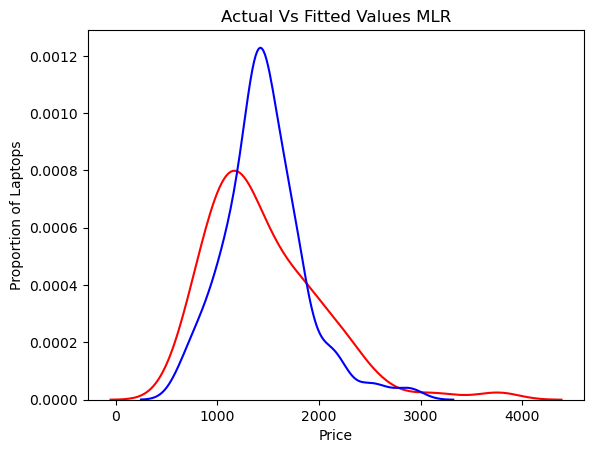

In [78]:
# Distribution plot of the predicted values and Actual values

ax1 = sns.distplot(df['Price'], hist = False, color = 'r', label = 'Actual Price')
sns.distplot(Y_hat, hist = False, color = 'b', label ='Predicted Value', ax = ax1)

plt.title('Actual Vs Fitted Values MLR')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.show()

In [80]:
# Mean squared value and R^2 score for this fit

mse_mlr = mean_squared_error(df['Price'],Y_hat)
r2_score_mlr = lm1.score(Z,Y)

print('The mean sqaured error(MSE) of MLR is ',mse_mlr)
print('The R-squared for MLR is ', r2_score_mlr)

The mean sqaured error(MSE) of MLR is  171139.40432032698
The R-squared for MLR is  0.4794820074485614


## Polynomial Regression

Use the variable 'CPU_frequency' to create polynomial features. Try this for 3 different values of polynomial degrees.

In [81]:
X = X.to_numpy().flatten()

f1 = np.polyfit(X,Y,1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X,Y,3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X,Y,5)
p5 = np.poly1d(f5)

In [82]:
p1,p3,p5

(poly1d([1485.19362648,  253.66117069]),
 poly1d([ 34090.28459545, -65742.18380715,  41288.68534408,  -7238.3350619 ]),
 poly1d([ 1357222.50879801, -4719545.23458483,  6458170.08678913,
        -4336492.05993684,  1425400.75895871,  -181813.39396735]))

In [86]:
def Polypot(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(),100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new,y_new,'-')
    plt.title(f'Polynomial Fit for price ~{Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

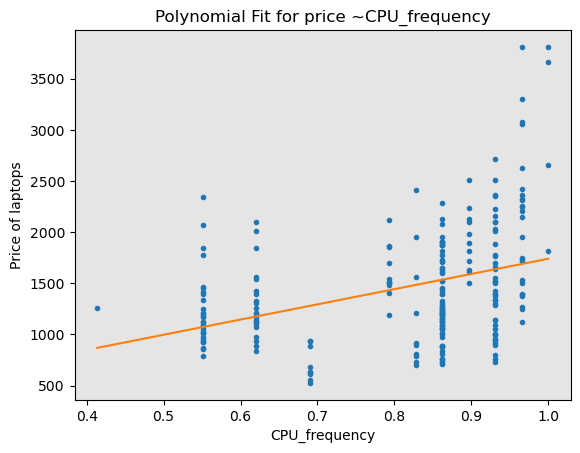

In [88]:
Polypot(p1, X, Y, 'CPU_frequency')

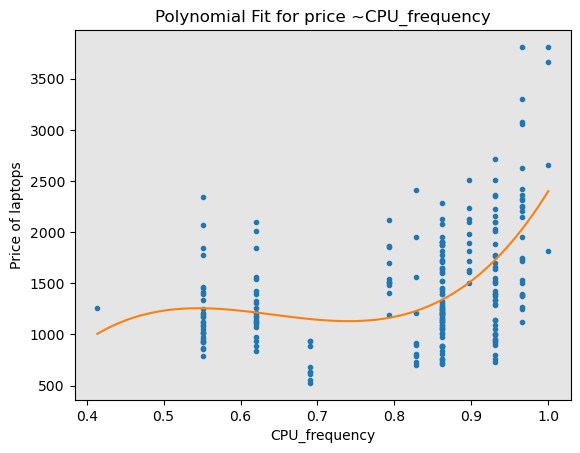

In [93]:
Polypot(p3, X,Y,'CPU_frequency')

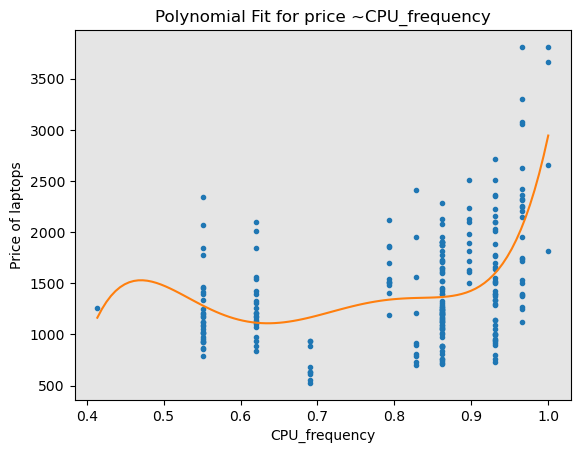

In [94]:
Polypot(p5, X,Y,'CPU_frequency')

In [98]:
# Calculating R^2 and MSE value for these fit

r_square_1 = r2_score(Y, p1(X))
r_square_3 = r2_score(Y, p3(X))
r_square_5 = r2_score(Y, p5(X))

print('The R-square value for 1st degree polynomial is: ',r_square_1)
print('The R-square value for 3rd degree polynomial is: ',r_square_3)
print('The R-square value for 5th degree polynomial is: ',r_square_5)

The R-square value for 1st degree polynomial is:  0.1344436321024326
The R-square value for 3rd degree polynomial is:  0.2669264079653094
The R-square value for 5th degree polynomial is:  0.3030822706442371


In [99]:
print('The MSE value for 1st degree polynomial is: ',mean_squared_error(Y,p1(X)))
print('The MSE value for 3rd degree polynomial is: ',mean_squared_error(Y,p3(X)))
print('The MSE value for 5th degree polynomial is: ',mean_squared_error(Y,p5(X)))

The MSE value for 1st degree polynomial is:  284583.4405868629
The MSE value for 3rd degree polynomial is:  241024.86303848823
The MSE value for 5th degree polynomial is:  229137.29548058534


<b>for 'RAM_GB' </b>

In [102]:
A = A.to_numpy().flatten()

A1 = np.polyfit(A,B,1)
p1 = np.poly1d(A1)

A3 = np.polyfit(A,B,3)
p3 = np.poly1d(A3)

A5 = np.polyfit(A,B,5)
p5 = np.poly1d(A5)

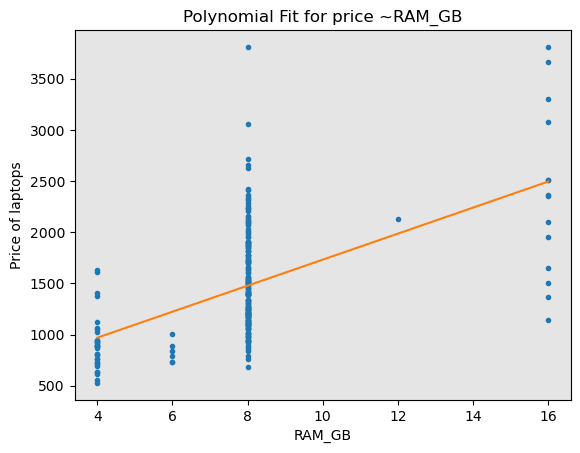

In [103]:
Polypot(p1,A , B, 'RAM_GB')

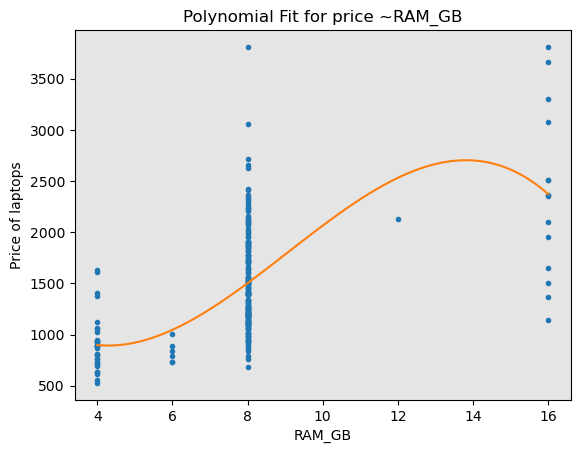

In [104]:
Polypot(p3,A,B,'RAM_GB')

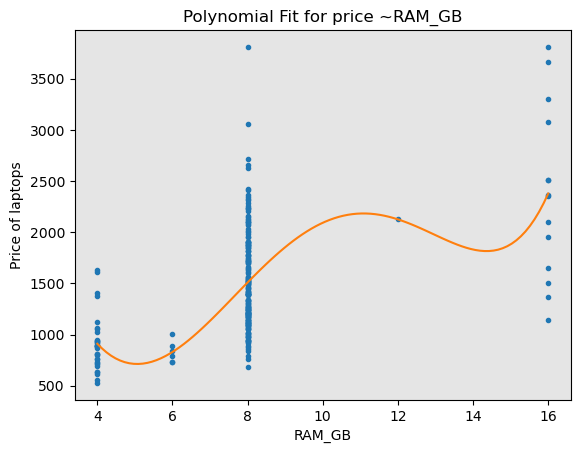

In [105]:
Polypot(p5, A,B,'RAM_GB')

In [106]:
# Calculating R^2 and MSE value for these fit

r1_square_1 = r2_score(B, p1(A))
r3_square_3 = r2_score(B, p3(A))
r5_square_5 = r2_score(B, p5(A))

print('The R-square value for 1st degree polynomial is: ',r1_square_1)
print('The R-square value for 3rd degree polynomial is: ',r3_square_3)
print('The R-square value for 5th degree polynomial is: ',r5_square_5)

The R-square value for 1st degree polynomial is:  0.3017275206956078
The R-square value for 3rd degree polynomial is:  0.31421153116195555
The R-square value for 5th degree polynomial is:  0.3200938770330719


In [107]:
print('The MSE value for 1st degree polynomial is: ',mean_squared_error(B,p1(A)))
print('The MSE value for 3rd degree polynomial is: ',mean_squared_error(B,p3(A)))
print('The MSE value for 5th degree polynomial is: ',mean_squared_error(B,p5(A)))

The MSE value for 1st degree polynomial is:  229582.71927482335
The MSE value for 3rd degree polynomial is:  225478.1424008004
The MSE value for 5th degree polynomial is:  223544.1051863433


## Pipeline

In [109]:
Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias = False)),('model',LinearRegression())]

pipe = Pipeline(Input)
Z = Z.astype(float)

pipe.fit(Z,Y)

y_pipe = pipe.predict(Z)
y_pipe[0:5]

array([1503.5,  763. , 1196. ,  931.5, 1526. ])

In [110]:
# Calcualte MSE and R^2 value for this predicted output

print('MSE of multi-variable polynomial pipeline is ',mean_squared_error(Y,y_pipe))

print('R-squared for multi-variable polynomial pipeline is ',r2_score(Y,y_pipe))

MSE of multi-variable polynomial pipeline is  126597.53781512605
R-squared for multi-variable polynomial pipeline is  0.6149554422770802


We saw that value of R^2 increased as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value

## 2.1 Multiple Linear Regression

In [112]:
lm2 = LinearRegression()
lm2

LinearRegression()

In [113]:
P = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','Screen_Size_inch','OS','CPU_core',"GPU"]]
Q = df['Price']

lm2.fit(P,Q)
lm2

LinearRegression()

In [114]:
yhat = lm2.predict(P)
yhat[0:5]

array([1238.39485524,  638.67580764, 1588.25022042, 1227.70033034,
       1411.31503481])

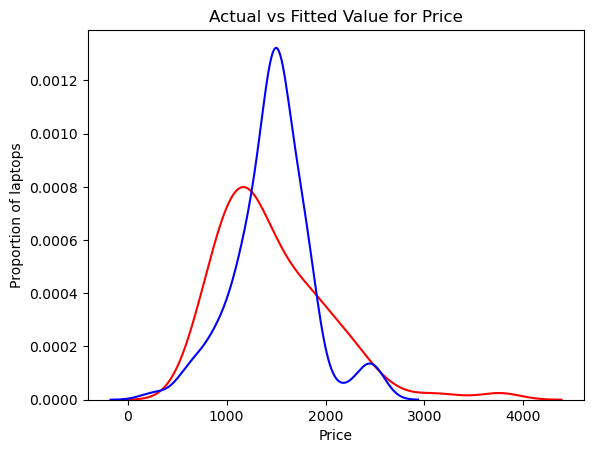

In [115]:
ax1 = sns.distplot(df['Price'],hist =False,color = 'r',label = 'Actual Value')
sns.distplot(yhat, hist = False, color ='b', label = 'Fitted Value', ax = ax1)

plt.title('Actual vs Fitted Value for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

plt.show()

In [116]:
# MSE and R^2 squared for this fit

mse_mlr2 = mean_squared_error(df['Price'],yhat)
r2_score_mlr2 = lm2.score(P,Q)

print('Mean Square Error(MSE) for SLR is ',mse_mlr2)
print('The R-square for Linear Regression is: ',r2_score_mlr2)

Mean Square Error(MSE) for SLR is  177295.76788530717
The R-square for Linear Regression is:  0.46075751780231744


<b> First Multiple Linear Regression Model is more efficient that second one! </b>